# Unit 1 Concept check

**Time:** 30 minutes

This is intended to be a quick review of the concepts we've covered up until now. Each question shouldn't take too long, so if you don't know an answer, skip it and come back to it later if there's time. Oh, and think of this as a "closed book" assessmnt, so no "Googling". :)

*This won't be graded, but will help Zunayed and me to assess student understanding in the class.*

**We ask that you submit this notebook with your answers to [[dropbox link]]**

In [2]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for plotting
sns.mpl.rc("figure", figsize=(12,4))
sns.set_context("notebook", font_scale=2)

# this allows plots to appear directly in the notebook
%matplotlib inline

# read data into a DataFrame
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
data.shape # or len(data)

(200, 4)

#### Question 1: How many rows does this dataframe have?

Answer: 200 rows

#### Question 2: What is the average sales?

Answer: 14.0225

In [10]:
data['TV']
notduplicate = []
for i in data['TV']:
    if i not in notduplicate:
        notduplicate.append(i)

len(notduplicate)

#data['TV'].value_counts() > 1

190

#### Question 3: Does the TV column have any repeated values?

Answer: yes, there appear to be 10 repeated values

In [8]:
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

#### Question 4: What are the types of each of the columns?

Answer: all of the variables are float64

#### Question 5: Filter the dataframe to only include rows where sales > 25

Answer:

In [9]:
data1 = data[data['Sales'] > 25]

In [14]:
data1.min() #see min sales value is 25.4

TV           243.2
Radio         42.0
Newspaper      5.0
Sales         25.4
dtype: float64

#### Question 5: What are the **predictors/features**?

Answer: TV, Radio and Newspaper

#### Question 5: What is the **response** (sometimes also called target)?

Answer: Sales

#### Question: Which pair of features are the most strongly correlated? What is the correlation coefficient for this pair?

In [15]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


TV and newspaper are the two features that are most correlated.

##### Create a boxplot including only the `TV`, `Radio`, and `Newspaper` columns

In [25]:
data2 = data[['TV', 'Radio', 'Newspaper']]

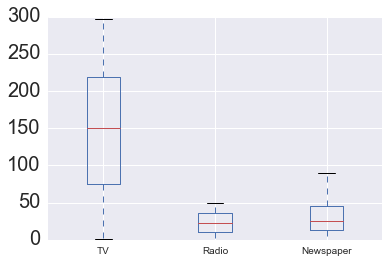

In [36]:
data2.boxplot(return_type='axes') #couldn't determine if this is possible with matplotlib

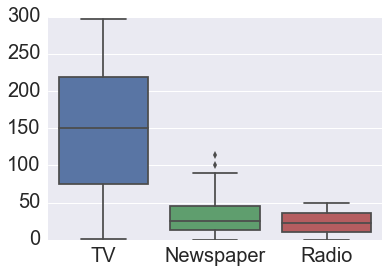

In [14]:
#or using seaborn
sns.boxplot(data[['TV', 'Newspaper', 'Radio']])

##### Create a regplot plot of sales as a function of TV Spend

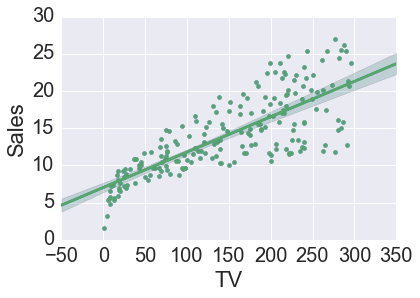

In [17]:
sns.regplot(data['TV'], data['Sales'])
sns.regplot(data=data, x='TV', y='Sales'); #semicolon gets rid of output

## Questions About the Advertising Data

Let's pretend you work for the company that manufactures and markets this new device. The company might ask you the following: On the basis of this data, how should we spend our advertising money in the future?

#### Is there a relationship between ads and sales?

Answer: there is a relationship between ads and sales given the correlation noted above with sales and predictors

#### Is this a causal relationship? Why or why not? 

Answer: with current information, we cannot infer causality from correlation

#### What other questions might you have about this data?

Answer: what times are the advertisments played on the tv/radio? on what page do we find the ads for newspaper?


---

Let's use **Statsmodels** to estimate the association between advertising efforts and sales. 

In [32]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
#formula notification is the equivalent to writing out our models such that 'outcome = predictor'
#with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'
lm = smf.ols(formula='Sales ~ TV', data=data).fit()

#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 20 Jun 2016   Prob (F-statistic):           1.47e-42
Time:                        18:56:49   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000         6.130     7.935
TV             0.0475      0.003     17.668      0.000         0.042     0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Question: Is this a statistically meaningful correlation (Based on a 95% confidence interval)? How can you tell?

Answer: there appears to be a statistically significant correlation between TV and Sales given the p value of 0 and 95% confidence interval that does not include 0.

#### Question: In your own words, what does R-squared represent?
    
Answer: R^2 gives us an idea of how much of the variation in the dependent variable is explained by our predictor variable(s). 

### Are there any questions you have for us?

I suppose if I get any of this incorrect, clarity would be helpful. Great so far!